In [3]:
import yfinance as yf
import numpy as np
import pandas as pd

In [4]:
tickers = [
    "^TNX",
    "^TYX",
    "^FVX",
    "^IRX",
]
t = yf.download(tickers= tickers, period='5y')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  4 of 4 completed


source: https://finance.yahoo.com/markets/bonds/

In [5]:
data = t['Close']

In [6]:
data['^FVX']
data['^TYX']

Date
2020-04-02    1.270
2020-04-03    1.214
2020-04-06    1.284
2020-04-07    1.332
2020-04-08    1.364
              ...  
2025-03-27    4.728
2025-03-28    4.633
2025-03-31    4.613
2025-04-01    4.516
2025-04-02    4.553
Name: ^TYX, Length: 1257, dtype: float64

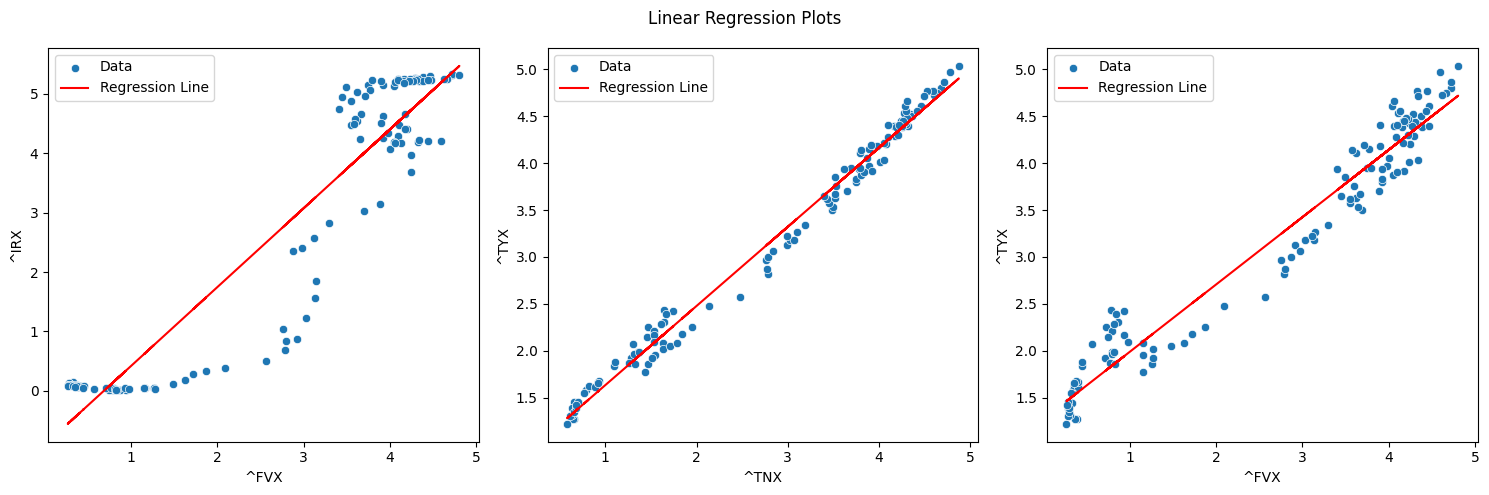

{'^FVX vs ^IRX': {'Slope': 1.3287829094733652,
  'Intercept': -0.9106084798046967,
  'R² Score': 0.8870640461817272},
 '^TNX vs ^TYX': {'Slope': 0.8427814344418564,
  'Intercept': 0.7926903278466813,
  'R² Score': 0.9890295192910492},
 '^FVX vs ^TYX': {'Slope': 0.7169389863387092,
  'Intercept': 1.2735265157747007,
  'R² Score': 0.9535193723443238}}

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Extracted data from the image

df = pd.DataFrame(data)

# Define pairs for regression plots
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# Extracted data from the image

df = pd.DataFrame(data)

# Define pairs for regression plots
pairs = [
    ("^FVX", "^IRX"),
    ("^TNX", "^TYX"),
    ("^FVX", "^TYX")
]
# Selecting every tenth data point (if available)
df_sampled = df.iloc[::10]

# Dictionary to store regression statistics
regression_stats = {}

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Linear Regression Plots")

for ax, (x_col, y_col) in zip(axes, pairs):
    x = df_sampled[x_col].values.reshape(-1, 1)
    y = df_sampled[y_col].values.reshape(-1, 1)

    if len(x) > 1:  # Ensure we have enough points for regression
        # Perform linear regression
        model = LinearRegression()
        model.fit(x, y)
        y_pred = model.predict(x)

        # Compute regression statistics
        slope = model.coef_[0][0]
        intercept = model.intercept_[0]
        r2 = r2_score(y, y_pred)

        # Store statistics
        regression_stats[f"{x_col} vs {y_col}"] = {
            "Slope": slope,
            "Intercept": intercept,
            "R² Score": r2
        }

        # Plot data and regression line
        sns.scatterplot(x=x.flatten(), y=y.flatten(), ax=ax, label="Data")
        ax.plot(x, y_pred, color="red", label="Regression Line")

        ax.set_xlabel(x_col)
        ax.set_ylabel(y_col)
        ax.legend()

plt.tight_layout()
plt.show()

# Display regression statistics
regression_stats
